# import libraries

In [1]:
# import libraries
library(tidyverse)
library(lubridate)
library(skimr)
library(ggplot2)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
Sales_data <- read_csv('/kaggle/input/shoe-store-sales-performance-data/sales.csv')
head(Sales_data)

Rows: 10000 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): shoe_id
dbl  (4): sale_id, branch_id, َquantity_sold, total_price
date (1): sale_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sale_id,branch_id,shoe_id,sale_date,َquantity_sold,total_price
<dbl>,<dbl>,<chr>,<date>,<dbl>,<dbl>
965600,1,SA819,2024-01-29,3,450
812647,3,FO622,2024-11-10,2,460
919003,3,SA627,2024-08-05,3,450
873105,2,BO381,2024-10-05,1,300
701505,2,SN401,2024-02-04,3,540
766754,2,HE320,2024-03-15,1,250


In [3]:
str(Sales_data)

spc_tbl_ [10,000 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ sale_id      : num [1:10000] 965600 812647 919003 873105 701505 ...
 $ branch_id    : num [1:10000] 1 3 3 2 2 2 2 2 3 1 ...
 $ shoe_id      : chr [1:10000] "SA819" "FO622" "SA627" "BO381" ...
 $ sale_date    : Date[1:10000], format: "2024-01-29" "2024-11-10" ...
 $ َquantity_sold: num [1:10000] 3 2 3 1 3 1 2 2 4 4 ...
 $ total_price  : num [1:10000] 450 460 450 300 540 250 500 500 480 720 ...
 - attr(*, "spec")=
  .. cols(
  ..   sale_id = col_double(),
  ..   branch_id = col_double(),
  ..   shoe_id = col_character(),
  ..   sale_date = col_date(format = ""),
  ..   َquantity_sold = col_double(),
  ..   total_price = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [4]:
summary(Sales_data)

    sale_id         branch_id       shoe_id            sale_date         
 Min.   :100063   Min.   :1.000   Length:10000       Min.   :2024-01-01  
 1st Qu.:319214   1st Qu.:1.000   Class :character   1st Qu.:2024-04-05  
 Median :542980   Median :2.000   Mode  :character   Median :2024-07-05  
 Mean   :546869   Mean   :2.005                      Mean   :2024-07-04  
 3rd Qu.:774809   3rd Qu.:3.000                      3rd Qu.:2024-10-06  
 Max.   :999951   Max.   :3.000                      Max.   :2024-12-31  
 َquantity_sold    total_price    
 Min.   :1.000   Min.   : 120.0  
 1st Qu.:1.000   1st Qu.: 250.0  
 Median :2.000   Median : 460.0  
 Mean   :2.493   Mean   : 502.7  
 3rd Qu.:3.000   3rd Qu.: 690.0  
 Max.   :4.000   Max.   :1200.0  

In [59]:
shoes <- read_csv('/kaggle/input/shoe-store-sales-performance-data/shoes.csv')
head(shoes)

Rows: 365 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): shoe_id, category, color
dbl (2): size, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


shoe_id,category,color,size,price
<chr>,<chr>,<chr>,<dbl>,<dbl>
SN935,Sneakers,Green,40,180
FO988,Formal,Blue,39,230
SN483,Sneakers,Black,36,180
CA591,Casual,Blue,37,190
BA771,Ballerina,Green,39,120
HE468,Heels,Blue,37,250


# Check for Missing Values

In [5]:
colSums(is.na(Sales_data))

sale_id     branch_id       shoe_id     sale_date َquantity_sold 
            0             0             0             0             0 
  total_price 
            0

# Data analysis and Visualization

In [15]:
# Add a columns named month,year
Sales_data <- Sales_data %>%
  mutate(
    sale_date = as_date(sale_date),
    year = year(sale_date),,
    month = month(sale_date, label = TRUE, abbr = FALSE)
  )
head(Sales_data %>% select(sale_date, year, month))

sale_date,year,month
<date>,<dbl>,<ord>
2024-01-29,2024,January
2024-11-10,2024,November
2024-08-05,2024,August
2024-10-05,2024,October
2024-02-04,2024,February
2024-03-15,2024,March


In [16]:
# 2024 sales

year2024sales <- Sales_data %>%
  group_by(year) %>%
  summarise(total_sales = sum(total_price))
year2024sales

year,total_sales
<dbl>,<dbl>
2024,5026680


In [44]:
# year sales for branchs

yr2024BRsales <- Sales_data %>%
  group_by(year) %>%
group_by(branch_id) %>%
  summarise(total_sales = sum(total_price))
yr2024BRsales

branch_id,total_sales
<dbl>,<dbl>
1,1670900
2,1674660
3,1681120


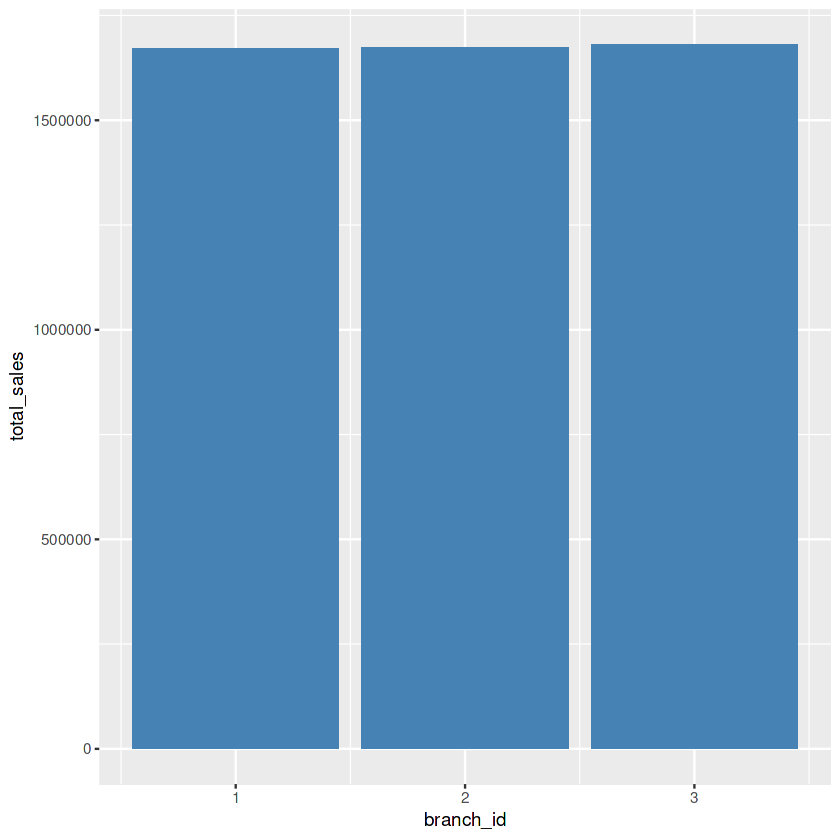

In [46]:
#plot for year 2024 sales by branch id 
ggplot(yr2024BRsales, aes(x = branch_id, y = total_sales)) +
  geom_col(fill = "steelblue")

In [17]:
# monthly sales

monthlysales <- Sales_data %>%
  group_by(month) %>%
  summarise(total_sales = sum(total_price))
monthlysales

month,total_sales
<ord>,<dbl>
January,412940
February,402490
March,393580
April,401680
May,419240
June,432510
July,420230
August,410910
September,403200


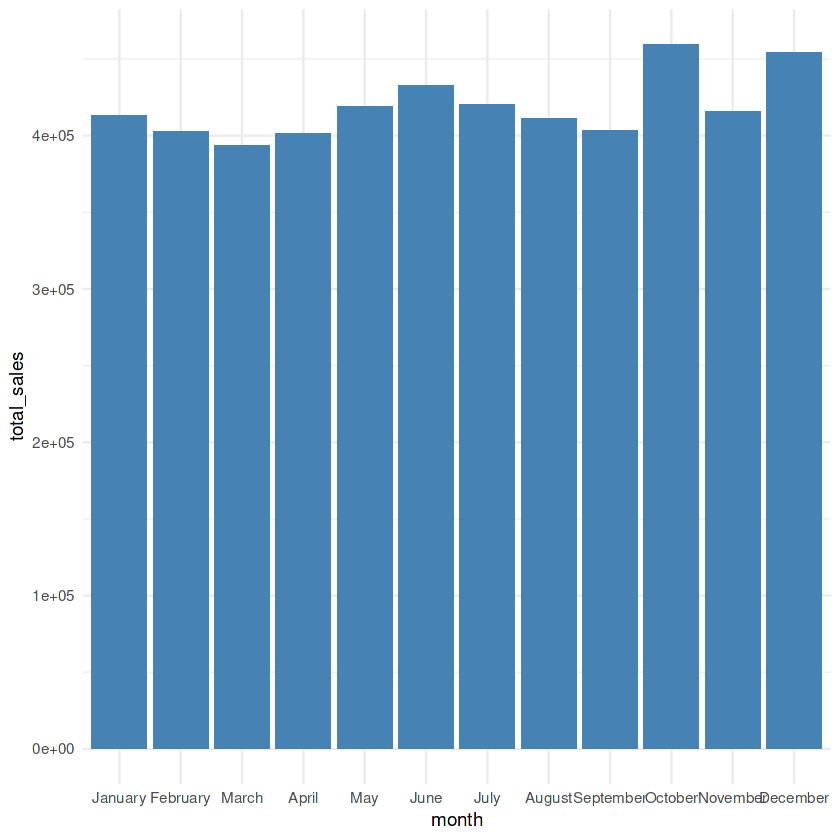

In [42]:
#plot for monthly sales
ggplot(monthlysales, aes(x = month, y = total_sales)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme_minimal()

In [51]:
#monthly sales for branches
monthlyBrsales <- Sales_data %>%
  group_by(branch_id, month) %>%
  summarise(total_sales = sum(total_price), .groups = "drop")
monthlyBrsales

branch_id,month,total_sales
<dbl>,<ord>,<dbl>
1,January,152770
1,February,124600
1,March,134510
1,April,129650
1,May,126240
1,June,155450
1,July,151770
1,August,131080
1,September,126030


In [60]:
#top month sales for branch
top_sales <- monthlyBrsales %>%
  group_by(branch_id) %>%
  filter(total_sales == max(total_sales))
top_sales

branch_id,month,total_sales
<dbl>,<ord>,<dbl>
1,October,161130
2,December,162130
3,May,154640


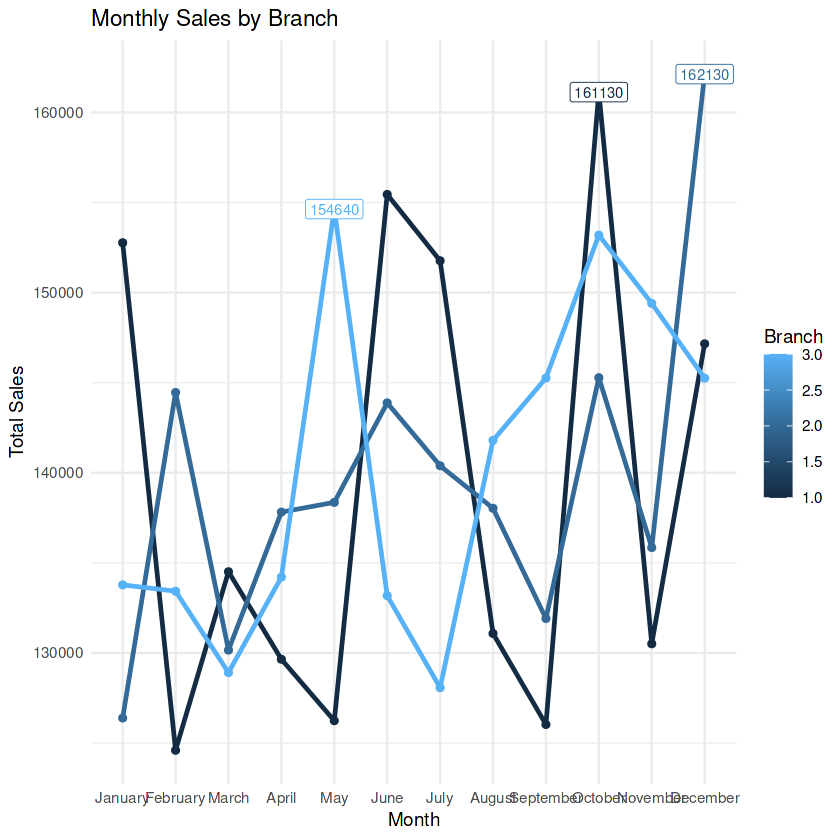

In [61]:
#plot for Monthly Sales by Branch
ggplot(monthlyBrsales, aes(x = month, y = total_sales, color = branch_id, group = branch_id)) +
  geom_line(size = 1) +
  geom_point() +
  geom_label(data = top_sales, aes(label = round(total_sales, 0)), 
             size = 3, fill = "white", label.size = 0.2, show.legend = FALSE) +
  theme_minimal() +
  labs(
    title = "Monthly Sales by Branch",
    x = "Month",
    y = "Total Sales",
    color = "Branch"
  )


In [54]:
#  2024 total shoes Sold

year2024QS <- Sales_data %>%
  group_by(year) %>%
  summarise(total_quantity_sold = sum(َquantity_sold))
year2024QS

year,total_quantity_sold
<dbl>,<dbl>
2024,24927


In [58]:
#  year quantity_sold for branchs

year2024QSBR <- Sales_data %>%
  group_by(branch_id) %>%
  summarise(total_quantity_sold = sum(َquantity_sold))
year2024QSBR

branch_id,total_quantity_sold
<dbl>,<dbl>
1,8329
2,8253
3,8345


In [63]:
# sales by Shoes category
df_merged <- left_join(Sales_data,shoes, by = "shoe_id")

top_shoes <- df_merged %>%
  group_by(category) %>%
  summarise(total_sales = sum(total_price, na.rm = TRUE)) %>%
  arrange(desc(total_sales))

top_shoes

category,total_sales
<chr>,<dbl>
Boots,1118700
Heels,815500
Formal,787980
Sneakers,696780
Casual,677540
Ballerina,523080
Sandals,407100


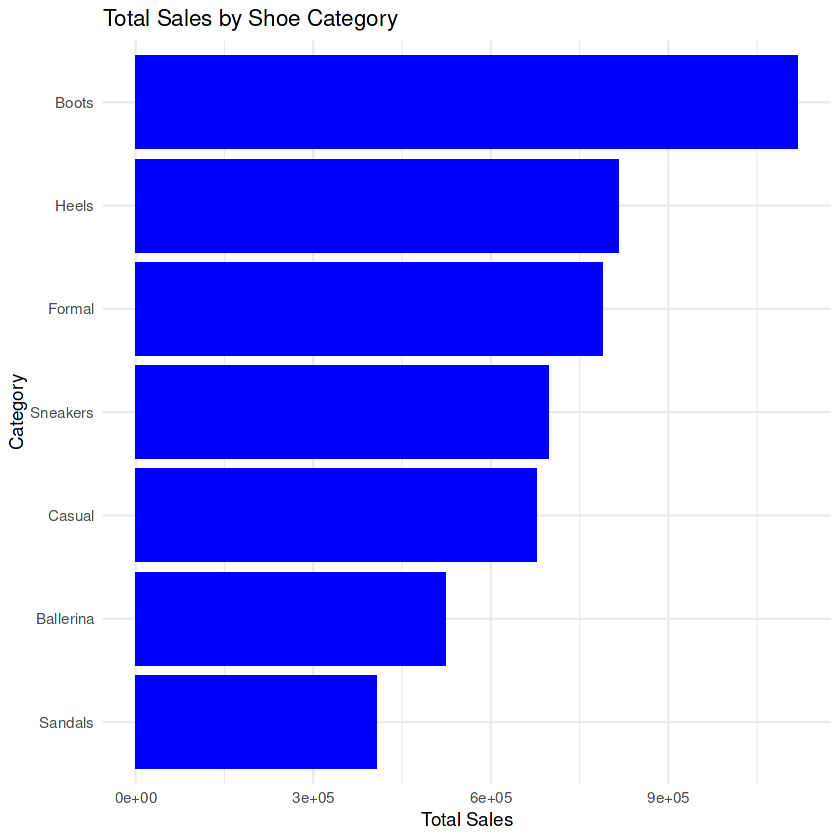

In [66]:
#plot for Total Sales by Shoe Category
ggplot(top_shoes, aes(x = reorder(category, total_sales), y = total_sales)) +
  geom_col(fill = "blue") +
  coord_flip() +
  labs(title = "Total Sales by Shoe Category", x = "Category", y = "Total Sales") +
  theme_minimal()

In [65]:
#Total Sales by Shoe Color
top_color <- df_merged %>%
  group_by(color) %>%
  summarise(total_sales = sum(total_price, na.rm = TRUE)) %>%
  arrange(desc(total_sales))

top_color

color,total_sales
<chr>,<dbl>
Black,862700
White,815380
Green,717210
Blue,687660
Gray,676220
Brown,651930
Red,615580


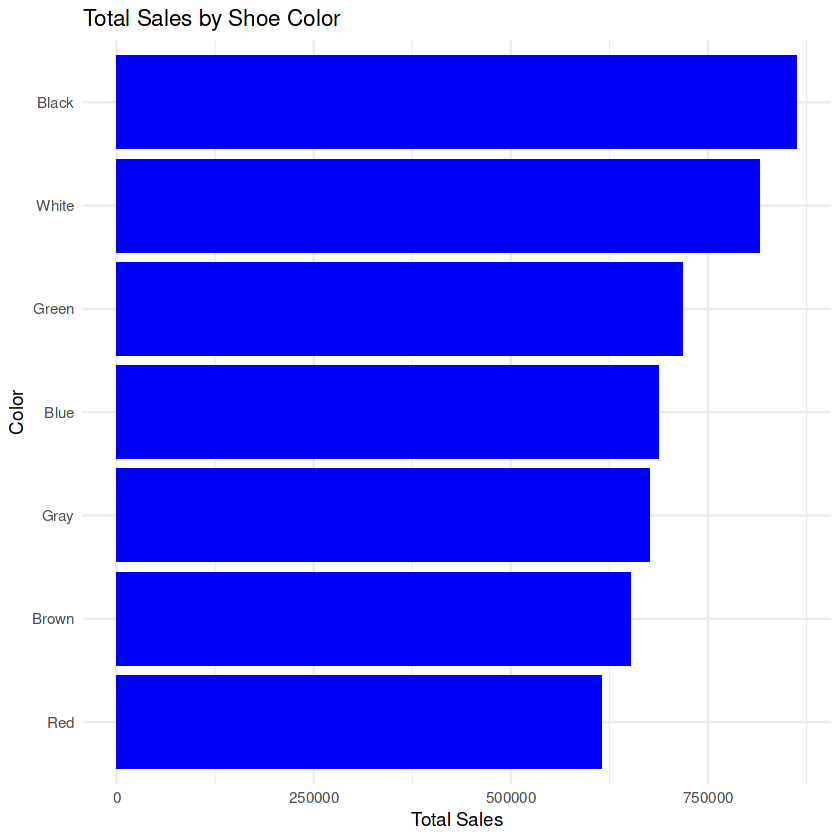

In [68]:
#plot for Total Sales by Shoe Color
ggplot(top_color, aes(x = reorder(color, total_sales), y = total_sales)) +
  geom_col(fill = "blue") +
  coord_flip() +
  labs(title = "Total Sales by Shoe Color", x = "Color", y = "Total Sales") +
  theme_minimal()

In [69]:
#Top-Selling by Shoes size
shoes_size <- df_merged %>%
  group_by(size) %>%
  summarise(total_sales = sum(total_price, na.rm = TRUE)) %>%
  arrange(desc(total_sales))

shoes_size

size,total_sales
<dbl>,<dbl>
37,1294350
40,1068220
39,1063750
38,846980
36,753380


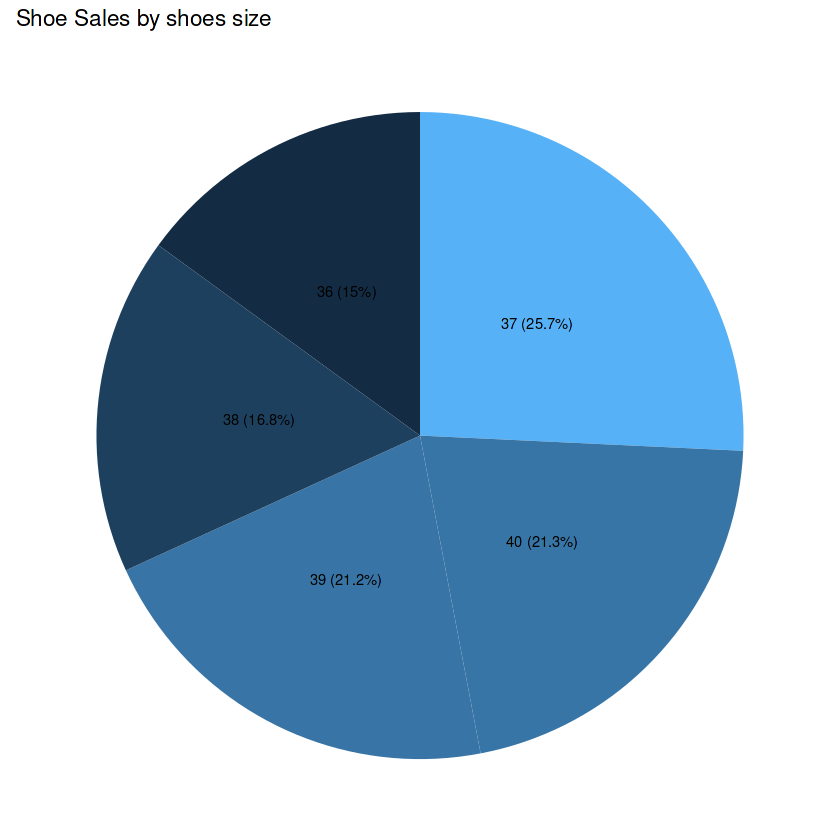

In [72]:
#pie plot for shoes size
shoes_size <- shoes_size %>%
mutate(
    percentage = total_sales / sum(total_sales) * 100,
    label = paste0(size, " (", round(percentage, 1), "%)")
  )

ggplot(shoes_size, aes(x = "", y = total_sales, fill = total_sales)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5), size = 3) +
  labs(title = "Shoe Sales by shoes size") +
  theme_void() +
  theme(legend.position = "none")
